# Machine Learning

We want to solve the mathematical problem of **regression**: given some input data $\{(x_i,y_i)\}$ with $i=1,\ldots,N$ and $x_i \in X \subset \mathbb{R}^{d_x}$, $y_i \in Y \subset \mathbb{R}^{d_y}$, we want to find a function $f:X\to Y$ such that $f(x_i) \approx y_i\,\forall (x_i, y_i)$. In the ML jargon, $x_i$ are the *features*, $y_i$ are the labels and $f$ is the model.

We will use a parametric model $f(x;\beta)$ wich depends on the parameters $\beta\in\mathbb{R}^{d_\beta}$ as well as on the features. Once we have decided on which parametric model to use, our work will be to determine the values of $\beta$ that provide the best regression. This is done by minimizing some *loss/cost function* that penalizes data that are not adequately described by the model.

## Polynomial regression

We will start with an example that is not traditionally classified as Machine Learning, but that shares many similarities.

Our features and labels will be unidimensional, $x_i \in \mathbb{R}$, $y_i \in \mathbb{R}$, and the parametric model is a polynomial of degree $n < N$, $$f(x;\beta) = \sum_{k=0}^n \beta_k x^k$$

An important point is that this particular model is *linear* in the parameters, So we can treat it with the usual linear least squares method, as if the $x^k$ were independent variables. We can determine the $\beta$ parameters by defining the MSE (Mean Squared Error) loss function
$$L = \frac{1}{N}\sum_{i=1}^N [y_i-f(x_i;\beta)]^2$$
and finding the values of $\beta$ that minimizes $L$. Since this is a linear model, there exists an analytical solution. Defining the matrix $F$ with elements $F_{ij} = x_i^j$, the estimators for the parameters $\hat{\beta}$ are given by

$$\hat{\beta} = (F^T F)^{-1}F^T y$$

In the ML jargon, the process of optimization of the loss function is called "training", and obtaining the estimators of our parameters is called "learning".

## Pandas

Pandas is a Python package used to store data in tabular fomat.

In [1]:
import pandas as pd

The basic object is `Series`, which represents a column of data:

In [3]:
col1 = pd.Series([2, 3, 4])

print(col1[2])

4


and `DataFrame`, which represents a table:

In [4]:
df1 = pd.DataFrame({'x': [1, 2, 3, 4], 'y': [1, 4, 9, 16]})

print(df1)

   x   y
0  1   1
1  2   4
2  3   9
3  4  16


We can extract each column as a `Series` object

In [14]:
df1["y"]

0     1
1     4
2     9
3    16
Name: y, dtype: int64

or even multiple columns as a `DataSet`

In [15]:
df1[["y", "x"]]

,y,x
0,1,1
1,4,2
2,9,3
3,16,4


To extract rows, we have to use `.loc`

In [16]:
df1.loc[3]

x     4
y    16
Name: 3, dtype: int64

In [17]:
df1.loc[[3, 0]]

,x,y
3,4,16
0,1,1


and we can even select only the rows that fulfill a condition:

In [19]:
df1.loc[df1["y"]>7] #Only the rows whose y value is greater than 7

,x,y
2,3,9
3,4,16


The methods `head` and `tail` select the first and last rows, respectively:

In [20]:
df1.head(2)

,x,y
0,1,1
1,2,4


In [21]:
df1.tail(1)

,x,y
3,4,16


The method `describe` tells us the maximum, minimum, mean, median, etc of each column:

In [22]:
df1.describe()

,x,y
count,4.000000,4.000000
mean,2.500000,7.500000
std,1.290994,6.557439
min,1.000000,1.000000
25%,1.750000,3.250000
50%,2.500000,6.500000
75%,3.250000,10.750000
max,4.000000,16.000000


We can create a new column (at the end of the table) by assigning to a non-existent column name:

In [23]:
df1['z'] = [1, 8, 27, 64]

In [24]:
df1

,x,y,z
0,1,1,1
1,2,4,8
2,3,9,27
3,4,16,64


and we can create a new row by assigning to a non-exitent one (doesn't have to be consecutive)

In [25]:
df1.loc[4] = [5, 25, 125]

In [26]:
df1

,x,y,z
0,1,1,1
1,2,4,8
2,3,9,27
3,4,16,64
4,5,25,125


In [27]:
df1.loc[6] = [7, 49, 343]

In [28]:
df1

,x,y,z
0,1,1,1
1,2,4,8
2,3,9,27
3,4,16,64
4,5,25,125
6,7,49,343


We can save a `DataSet` as a plain file using `to_csv`. By default, it uses commas to separate the columns, but we can use any other string (for example, a tab stop) with the argument `sep=`. If we don't want to store the column names and row numbers, we can specify it with the arguments `header` and `index` respectively:

In [33]:
df1.to_csv('test.dat', sep='\t', header=False, index=False)

And we can use pandas to read data from a file. We must provide the column names, otherwise pandas will use the first row as the names:

In [34]:
RKdata = pd.read_csv('RKwilson.dat', sep='\t', names=['C9', 'C10', 'RK'])

In [35]:
RKdata.describe()

,C9,C10,RK
count,2000.000000,2000.000000,2000.000000
mean,-0.497404,0.003120,0.893732
std,0.289449,0.291333,0.095359
min,-0.999923,-0.499807,0.674694
25%,-0.743522,-0.251231,0.823446
50%,-0.493924,0.007029,0.889795
75%,-0.246108,0.259740,0.961966
max,-0.000645,0.499238,1.127950


The values of $C_9$ are in the range $[-1.0, 0.0]$, and the values of $C_{10}$ in $[-0.5, 0.5]$.

## A polynomial model

The data that we have just opened corresponds to values of the Wilson coefficients $C_9$ and $C_{10}$ and the corresponding prediction for the observable $R_K$. Let's find a polynomial model to describe the data.

First, we can visualize the data passing each `Series` object to `matplotlib`:

In [36]:
import matplotlib.pyplot as plt

(-1.0, 0.0)

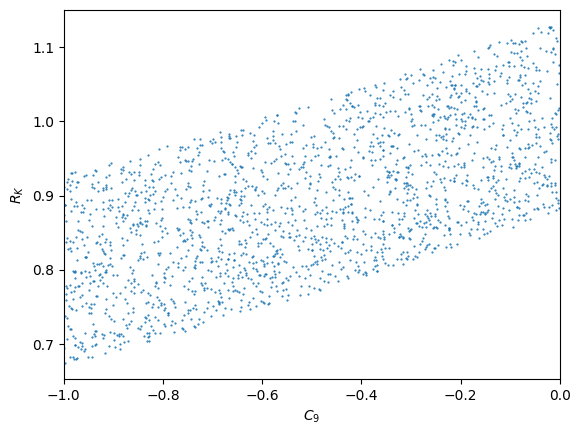

In [39]:
plt.scatter(RKdata['C9'], RKdata['RK'], s=0.3)
plt.xlabel('$C_9$')
plt.ylabel('$R_K$')
plt.xlim(-1, 0)

(-0.5, 0.5)

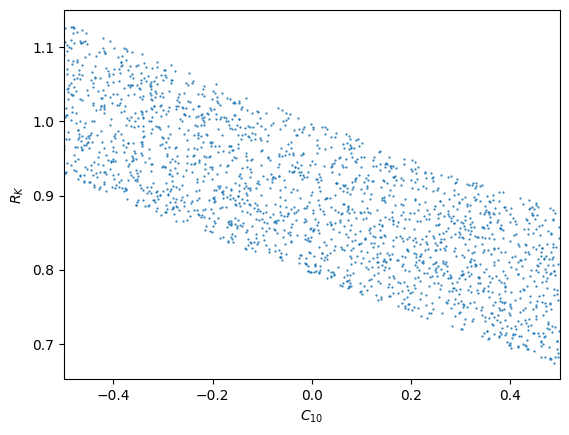

In [41]:
plt.scatter(RKdata['C10'], RKdata['RK'], s=0.3)
plt.xlabel('$C_{10}$')
plt.ylabel('$R_K$')
plt.xlim(-0.5, 0.5)

And now a 3d visualization:

(-0.5, 0.5)

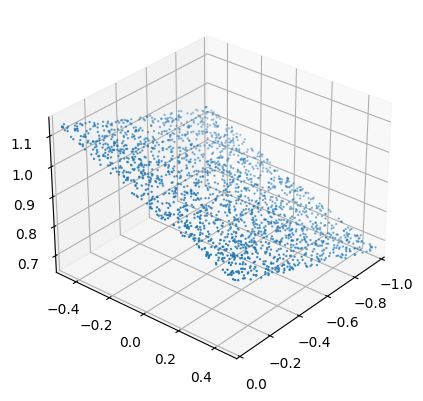

In [98]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(azim=40)
ax.scatter(RKdata['C9'], RKdata['C10'], RKdata['RK'], s=0.5)
plt.xlim(-1, 0)
plt.ylim(-0.5, 0.5)

Our polynomial model will be
$$f(C_9, C_{10}; \beta) = \beta_0 + \beta_1 C_9 + \beta_2 C_{10} + \beta_3 C_9^2 + \beta_4 C_{10}^2$$

It is clear that $\beta_0$ corresponds to the SM prediction, so we will expect that $\beta_0 \approx 1$. Also, $R_K$ in the WET is proportional to $|\mathcal{M}_\mathrm{SM}+\mathcal{M}_\mathrm{WET}|^2$ with $\mathcal{M}_\mathrm{WET}$ linear in the Wilson coefficients, so $\beta_3$ and $\beta_4$ have to be positive.

In [43]:
import numpy as np

F = np.matrix(np.zeros((2000,5)))

We create the $F$ matrix

In [47]:
for i in range(2000):
    F[i, 0] = 1
    F[i, 1] = RKdata['C9'][i]
    F[i, 2] = RKdata['C10'][i]
    F[i, 3] = RKdata['C9'][i]**2
    F[i, 4] = RKdata['C10'][i]**2

and calculate the estimators of $\beta$

In [74]:
beta = np.squeeze(np.asarray(((F.T @ F).I @ F.T @ RKdata['RK'].values)))

In [75]:
beta

array([ 1.00077063,  0.23935628, -0.25715944,  0.03080949,  0.03085803])

And that completes our polynomial model

In [81]:
f_RK = lambda x, y: beta[0] + beta[1]*x + beta[2]*y + beta[3]*x**2 + beta[4]*y**2

Let's compare our model to the training dataset

In [83]:
X = np.arange(-1, 0, 0.05)
Y = np.arange(-0.5, 0.5, 0.05)
X, Y = np.meshgrid(X, Y)
Z = f_RK(X, Y)

(-0.5, 0.5)

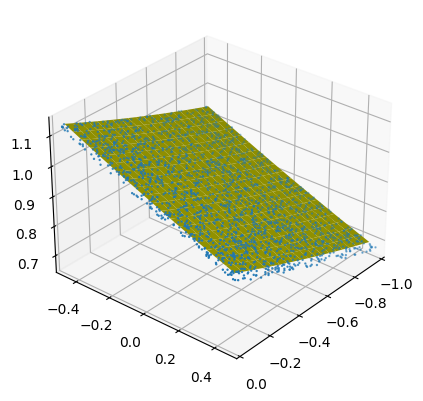

In [99]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(azim=40)
ax.scatter(RKdata['C9'], RKdata['C10'], RKdata['RK'], s=0.5)
ax.plot_surface(X, Y, Z, color='y')
plt.xlim(-1, 0)
plt.ylim(-0.5, 0.5)

## So what is Machine Learning?

Machine Learning are algorithms that use datasets to build models ("learn") and perfrom tasks. These models are quite complicated, so it is not possible to write them down in an analytical form-- unlike our "simple" model, in which we know the exact formula to obtain the parameters-- and in consequence, it is necessary to use computer programs.

The complexity of these models is due to two reasons:
* The dimensionality of the features. For example, if we want to analyze a picture, we will need three input data for each pixel, and pictures have typically millions of pixels. Or in a LLM (e.g. ChatGPT), the inputs are all word stems, prefixes and suffixes in the dictionary.
* The complexity of the interrelations between the data. In our example we used a very simple second-degree polynomial, but as you can imagine, it is much more complicated to establish the conditions for a bunch of pixels to define a `dog` or a `cat` in a picture. Or that the word `pencil` is usually associated with the verb `write` and not with `swim` in a LLM.

There are three ways to "train" a ML algorithm:
* **Supervised learning:** The algorithm is fed with the features and the labels, and has to build a model that can predict the label for a new feature. This is tha case that we are going to focus in.
* **Unsupervised learning:** The algorithm is fed only with features, and has to detect patterns or anomalies.
* **Reinforced learning:** The algorithm receives feedback (rewards or punishments) each time it performs an action.

We have focused mainly on regression problems, but regression is a quite generic task. For example, if you want to classify pictures as containing a `dog` or not, you can create a regression problem por the probability of containing a dog, and select only the pictures above a certain probability threshold. Or ChatGPt writes texts by putting together words that have a high probability of being related, and has obtained those probabilities by a regression problem. Alternatively, we can turn a classification algorithm into a regression one, by defining many categories, and assigning a nuber to each category.

In the begining, we said that our features belong to a certain set $x_i \in X \subset \mathbb{R}^{d_x}$. But what happens when we apply the model to a $x$ outside of $X$? In general, the models are not well-behaved outside $X$, and any result is not trustworthy. In the LLM sector, some people call this phenomenon "hallucination", but is not something new, it happens to most regression models when you try to extrapolate [NOTE: In our $R_K$ example, the underlying function is a second-order polynomial, so the predictions are accurate even outside of the area covered by the dataset. But this is an accidental coincidence, not a general characteristic of ML models!]